<a href="https://colab.research.google.com/github/BeePandey/Birendra_Info5731_Spring2021/blob/main/In_class_exercise_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The seventh in-class-exercise (20 points in total, 3/16/2021)**

Question description: In the last in-class-exercise (exercise-06), you collected the titles of 100 articles about data science, natural language processing, and machine learning. The 100 article titles will be used as the text corpus of this exercise. Perform the following tasks:

## (1) (8 points) Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here: 

https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [1]:
# Write your code here

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
# Write your code here
import os
def install_java():
  !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
  !java -version
install_java()


openjdk version "11.0.10" 2021-01-19
OpenJDK Runtime Environment (build 11.0.10+9-Ubuntu-0ubuntu1.18.04)
OpenJDK 64-Bit Server VM (build 11.0.10+9-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)


In [4]:
!pip install --upgrade gensim

     |████████████████████████████████| 24.2MB 176kB/s 
  Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [5]:
pip install pyLDAvis

     |████████████████████████████████| 1.7MB 4.2MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.2.2-py2.py3-none-any.whl size=135593 sha256=84aca039aa3d09e3031858ebb5a898301bd62bc1a3756d8654193ce858b8488e
  Stored in directory: /root/.cache/pip/wheels/74/df/b6/97234c8446a43be05c9a8687ee0db1f1b5ade5f27729187eae
Successfully built pyLDAvis


In [3]:
import spacy.cli
spacy.cli.download("en")

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [6]:
import re
import numpy as np
import pandas as pd
from pprint import pprint
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import spacy
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping


In [12]:

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [15]:
google_articles_titles = pd.read_csv('/content/sample_data/articleList.csv')
google_articles_titles.head(10)

,Title
0,Data science in action
1,Data science and prediction
2,Data science and its relationship to big data ...
3,[BOOK][B] Data Science for Business: What you ...
4,[BOOK][B] High-dimensional probability: An int...
5,Computational optimal transport: With applicat...
6,"Data science, predictive analytics, and big da..."
7,"Reproducible, interactive, scalable and extens..."
8,The quantified self: Fundamental disruption in...
9,[HTML][HTML] Big data: astronomical or genomical?


In [16]:


data = google_articles_titles['Title'].tolist()

In [17]:
data_words = []
for line in data:
  data_words.append(gensim.utils.simple_preprocess(str(line), deacc=True))

In [19]:
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100)
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)


In [20]:
after_stopword_removal = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in data_words]
bigrams = [bigram_mod[doc] for doc in after_stopword_removal]

In [21]:
nlp = spacy.load('en', disable=['parser', 'ner'])
allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']
after_lemmatization = []
for sent in bigrams:
  doc = nlp(" ".join(sent)) 
  after_lemmatization.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])

In [23]:
id2word = corpora.Dictionary(after_lemmatization)
texts = after_lemmatization
corpus = [id2word.doc2bow(text) for text in after_lemmatization]

In [24]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('action', 1), ('datum', 1), ('science', 1)]]

In [26]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [28]:
print('\nPerplexity: ', lda_model.log_perplexity(corpus)) 
coherence_model_lda = CoherenceModel(model=lda_model, texts=after_lemmatization, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -2.890953000567176

Coherence Score:  0.4723963504125299


In [29]:

!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
!unzip mallet-2.0.8.zip

--2021-03-21 23:49:35--  http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Resolving mallet.cs.umass.edu (mallet.cs.umass.edu)... 128.119.246.70
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16184794 (15M) [application/zip]
Saving to: ‘mallet-2.0.8.zip’

mallet-2.0.8.zip    100%[===================>]  15.43M  5.88MB/s    in 2.6s    

2021-03-21 23:49:38 (5.88 MB/s) - ‘mallet-2.0.8.zip’ saved [16184794/16184794]

Archive:  mallet-2.0.8.zip
   creating: mallet-2.0.8/
   creating: mallet-2.0.8/bin/
  inflating: mallet-2.0.8/bin/classifier2info  
  inflating: mallet-2.0.8/bin/csv2classify  
  inflating: mallet-2.0.8/bin/csv2vectors  
  inflating: mallet-2.0.8/bin/mallet  
  inflating: mallet-2.0.8/bin/mallet.bat  
  inflating: mallet-2.0.8/bin/mallethon  
  inflating: mallet-2.0.8/bin/prepend-license.sh  
  inflating: mallet-2.0.8/bin/svmlight2vectors  
  inflating: mallet-2.0.8/bin/text2classi

In [30]:
os.environ['MALLET_HOME'] = '/content/mallet-2.0.8'
mallet_path = '/content/mallet-2.0.8/bin/mallet'

In [31]:
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=20, id2word=id2word)

In [32]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [33]:

model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=after_lemmatization, start=2, limit=60, step=6)

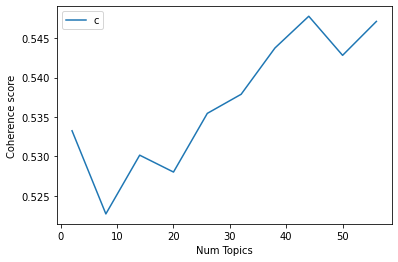

In [35]:
limit=60; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()


In [36]:
for no_of_topics, cv in zip(range(2, 60, 6), coherence_values):
  print("Num Topics:", no_of_topics, " - Coherence Value:", round(cv, 4))

Num Topics: 2  - Coherence Value: 0.5332
Num Topics: 8  - Coherence Value: 0.5227
Num Topics: 14  - Coherence Value: 0.5301
Num Topics: 20  - Coherence Value: 0.528
Num Topics: 26  - Coherence Value: 0.5355
Num Topics: 32  - Coherence Value: 0.5379
Num Topics: 38  - Coherence Value: 0.5438
Num Topics: 44  - Coherence Value: 0.5478
Num Topics: 50  - Coherence Value: 0.5428
Num Topics: 56  - Coherence Value: 0.5471


In [37]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=14, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [38]:
print(lda_model.print_topics())
doc_lda = lda_model[corpus]


[(0, '0.277*"datum" + 0.275*"science" + 0.138*"application" + 0.137*"transport" + 0.137*"prediction" + 0.002*"making" + 0.002*"big" + 0.002*"relationship" + 0.002*"drive" + 0.002*"decision"'), (1, '0.217*"datum" + 0.109*"science" + 0.109*"nee" + 0.109*"mining" + 0.109*"know" + 0.109*"business" + 0.109*"analytic" + 0.109*"thinking" + 0.001*"biological" + 0.001*"quantified"'), (2, '0.069*"datum" + 0.046*"science" + 0.036*"analytic" + 0.034*"mining" + 0.034*"know" + 0.034*"nee" + 0.034*"business" + 0.034*"thinking" + 0.028*"action" + 0.027*"making"'), (3, '0.161*"science" + 0.160*"self" + 0.160*"biological" + 0.160*"discovery" + 0.160*"quantified" + 0.160*"fundamental" + 0.004*"datum" + 0.002*"decision" + 0.002*"relationship" + 0.002*"drive"'), (4, '0.049*"datum" + 0.039*"analytic" + 0.039*"science" + 0.031*"predictive" + 0.031*"revolution" + 0.031*"supply" + 0.031*"transform" + 0.031*"management" + 0.031*"chain" + 0.031*"design"'), (5, '0.036*"science" + 0.036*"scalable" + 0.036*"datum" 

In [39]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
13     0.164547 -0.059011       1        1  15.970002
1      0.068727 -0.110894       2        1  15.965418
10    -0.211306 -0.240662       3        1  15.958305
12     0.125176  0.006166       4        1  12.392226
0      0.238735 -0.008989       5        1  11.799777
3     -0.049336  0.356765       6        1  10.607627
7      0.177581 -0.000933       7        1   8.760456
9      0.230823 -0.016896       8        1   5.188573
2     -0.088324 -0.012766       9        1   0.590162
4     -0.124348  0.003298      10        1   0.582514
5     -0.116844  0.019555      11        1   0.556239
6     -0.138477  0.021456      12        1   0.542901
8     -0.138477  0.021456      13        1   0.542900
11    -0.138477  0.021456      14        1   0.542900, topic_info=           Term        Freq       Total Category  logprob  loglift
1         datum  103.000000  103.000000  Default  30.0000  30.0000
2       science   74.000000   74.000000  Default  29.0000  29.0000
9      analytic   20.000000   20.000000  Default  28.0000  28.0000
15  application   19.000000   19.000000  Default  27.0000  27.0000
0        action    9.000000    9.000000  Default  26.0000  26.0000
..          ...         ...         ...      ...      ...      ...
2       science    0.082943   74.538200  Topic14  -3.5835  -1.5849
15  application    0.082943   19.233330  Topic14  -3.5835  -0.2302
6         drive    0.082943   10.576050  Topic14  -3.5835   0.3678
7        making    0.082943   10.576038  Topic14  -3.5835   0.3678
9      analytic    0.082943   20.102553  Topic14  -3.5835  -0.2744

[523 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
0         8  0.915013        action
9         2  0.497449      analytic
9         3  0.497449      analytic
15        4  0.467938   application
15        5  0.467938   application
4         1  0.945538           big
31        6  0.875014    biological
10        2  0.948322      business
21        3  0.946835         chain
1         1  0.280195         datum
1         2  0.183576         datum
1         3  0.096619         datum
1         4  0.086957         datum
1         5  0.173914         datum
1         7  0.086957         datum
1         8  0.086957         datum
5         1  0.945536      decision
22        3  0.946835        design
16        4  0.868568   dimensional
32        6  0.875014     discovery
6         1  0.945533         drive
28        7  0.881542    extensible
33        6  0.875015   fundamental
17        4  0.868568          high
18        4  0.868568  introduction
11        2  0.948322          know
7         1  0.945534        making
23        3  0.946835    management
12        2  0.948322        mining
13        2  0.948322           nee
3         5  0.911257    prediction
24        3  0.946835    predictive
19        4  0.868568   probability
34        6  0.875014    quantified
8         1  0.945535  relationship
25        3  0.946835    revolution
29        7  0.881542      scalable
2         1  0.134159       science
2         2  0.134159       science
2         4  0.120743       science
2         5  0.241487       science
2         6  0.120743       science
2         7  0.120743       science
2         8  0.120743       science
35        6  0.875014          self
26        3  0.946835        supply
14        2  0.948322      thinking
27        3  0.946835     transform
20        5  0.911361     transport
30        7  0.881542           use, R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[14, 2, 11, 13, 1, 4, 8, 10, 3, 5, 6, 7, 9, 12])

## (2) (8 points) Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [40]:
# Write your code here
from gensim.models import LsiModel

In [41]:
lsamodel = LsiModel(corpus, 20, id2word)

In [42]:
def compute_coherence_values_lsi(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        # generate LSA model
        model = LsiModel(doc_term_matrix, num_topics=20, id2word = dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

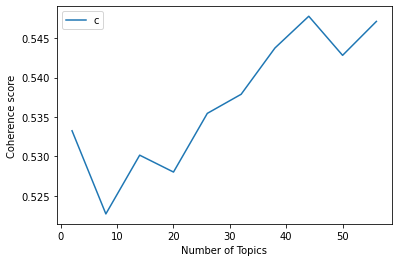

In [43]:
start,stop,step=2,60,6
model_list_lsa, coherence_values_lsa = compute_coherence_values_lsi(id2word, corpus,after_lemmatization,stop, start, step)
x = range(start, stop, step)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [44]:
for no_of_topics, cv in zip(range(2, 60, 6), coherence_values_lsa):
  print("Num Topics:", no_of_topics, " - Coherence Value:", round(cv, 4))

Num Topics: 2  - Coherence Value: 0.4705
Num Topics: 8  - Coherence Value: 0.4539
Num Topics: 14  - Coherence Value: 0.4507
Num Topics: 20  - Coherence Value: 0.4316
Num Topics: 26  - Coherence Value: 0.4674
Num Topics: 32  - Coherence Value: 0.427
Num Topics: 38  - Coherence Value: 0.4349
Num Topics: 44  - Coherence Value: 0.4553
Num Topics: 50  - Coherence Value: 0.4377
Num Topics: 56  - Coherence Value: 0.4302


In [45]:

print(lsamodel.print_topics())

[(0, '0.792*"datum" + 0.453*"science" + 0.128*"analytic" + 0.115*"relationship" + 0.115*"making" + 0.115*"big" + 0.115*"drive" + 0.115*"decision" + 0.099*"application" + 0.088*"mining"'), (1, '0.357*"analytic" + -0.319*"science" + 0.303*"chain" + 0.303*"management" + 0.303*"transform" + 0.303*"design" + 0.303*"predictive" + 0.303*"revolution" + 0.303*"supply" + -0.139*"application"'), (2, '-0.347*"science" + -0.255*"self" + -0.255*"fundamental" + -0.255*"discovery" + -0.255*"quantified" + -0.255*"biological" + 0.232*"big" + 0.232*"relationship" + 0.232*"decision" + 0.232*"drive"'), (3, '-0.351*"thinking" + -0.351*"mining" + -0.351*"know" + -0.351*"business" + -0.351*"nee" + -0.218*"analytic" + 0.202*"application" + 0.151*"high" + 0.151*"dimensional" + 0.151*"probability"'), (4, '0.359*"application" + -0.291*"biological" + -0.291*"quantified" + -0.291*"self" + -0.291*"fundamental" + -0.291*"discovery" + 0.281*"probability" + 0.281*"introduction" + 0.281*"dimensional" + 0.281*"high"'), (

## (3) (4 points) Compare the results generated by the two topic modeling algorithms, which one is better? You should explain the reasons in details.

LSA is a linear algebra method whereas LDA is probabilistic.LDA is easily the most effective topic modeling technique. Initially the coherence value is of 0.6995, later after increasing up the steps we have got the number of topics also increased. Overall i can say that LDA has the highest Coherence value that means LDA has more accuracy compared to that of LSA. The coherernt values differ for LSA and LDA. In addition to that, we can not expand the limit in lSA. Also LSA has low accuracy when compared to LDA. SO, I think LDA is better than LSA.